In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv
/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv


In [6]:
import pandas as pd
air = pd.read_csv('/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv')
air

Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                         Italy   Priolo Gargallo         66     Moderate   
3                        Poland         Przasnysz         34         Good   
4                        France          Punaauia         22         Good   
...                         ...               ...        ...          ...   
23458                     India      Gursahaiganj        184    Unhealthy   
23459                    France            Sceaux         50         Good   
23460                     India          Mormugao         50         Good   
23461  United States of America       Westerville         71     Moderate   
23462                  Malaysia            Marang         70     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
0                 1            Good               36               Good   
1                 1            Good                5               Good   
2                 1            Good               39               Good   
3                 1            Good               34               Good   
4                 0            Good               22               Good   
...             ...             ...              ...                ...   
23458             3            Good              154          Unhealthy   
23459             1            Good               20               Good   
23460             1            Good               22               Good   
23461             1            Good               44               Good   
23462             1            Good               38               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0                  0             Good               51           Moderate  
1                  1             Good               41               Good  
2                  2             Good               66           Moderate  
3                  0             Good               20               Good  
4                  0             Good                6               Good  
...              ...              ...              ...                ...  
23458              2             Good              184          Unhealthy  
23459              5             Good               50               Good  
23460              1             Good               50               Good  
23461              2             Good               71           Moderate  
23462              0             Good               70           Moderate  

[23463 rows x 12 columns]

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


**About the global air pollution dataset.csv**
* Country : Name of the country
* City : Name of the city
* AQI Value : Overall AQI value of the city, (0-33: Very Good; 34-66: Good; 67-99: Fair; 100-149: Poor; 150-199: Very Poor; 200+: Hazardous)
* AQI Category : Overall AQI category of the city 
* CO AQI Value : AQI value of Carbon Monoxide of the city
* CO AQI Category : AQI category of Carbon Monoxide of the city
* Ozone AQI Value : AQI value of Ozone of the city
* Ozone AQI Category : AQI category of Ozone of the city
* NO2 AQI Value : AQI value of Nitrogen Dioxide of the city
* NO2 AQI Category : AQI category of Nitrogen Dioxide of the city
* PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
* PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city


In [8]:
air.value_counts()

Country      City                AQI Value  AQI Category    CO AQI Value  CO AQI Category  Ozone AQI Value  Ozone AQI Category              NO2 AQI Value  NO2 AQI Category  PM2.5 AQI Value  PM2.5 AQI Category
Afghanistan  Acin                62         Moderate        0             Good             46               Good                            0              Good              62               Moderate              1
Poland       Radzyn Podlaski     42         Good            1             Good             42               Good                            0              Good              28               Good                  1
             Skawina             58         Moderate        1             Good             34               Good                            2              Good              58               Moderate              1
             Skarzysko Kamienna  32         Good            1             Good             28               Good                            1        

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

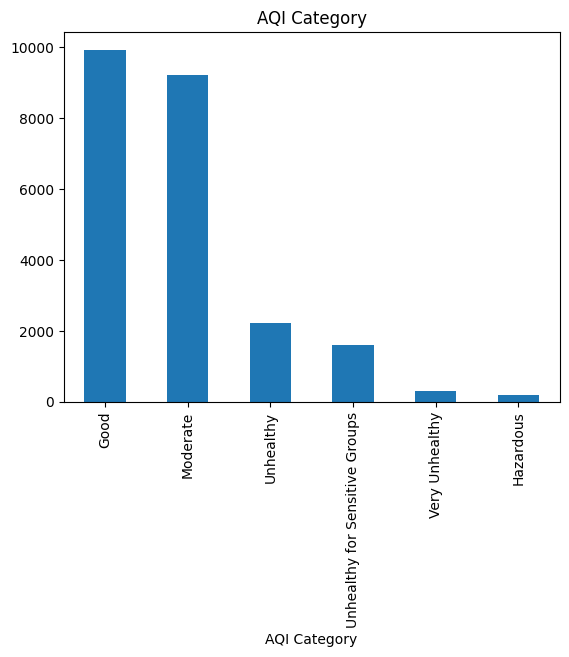

In [10]:
air['AQI Category'].value_counts().plot.bar()
plt.title('AQI Category')
plt.show()

**Unhealthy Air Quality:** When the AQI exceeds 100, air quality becomes unhealthy, and the risk to health rises.

**Good Air Quality:** An AQI value of 50 or below represents good air quality.

**Mederate Air Quality:** An AQI value of 51 or above represents moderate air quality.

* Most of the Cities air quality is good (9688 cities)
* 9087 city is Moderate air quality
* 2215 city have Unhealthy air quality
* 286 city's air quality is Very Unhealthy and 191 is Hazardous

In [11]:
air['Country'].value_counts()

Country
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: count, Length: 175, dtype: int64

<Axes: xlabel='Country'>

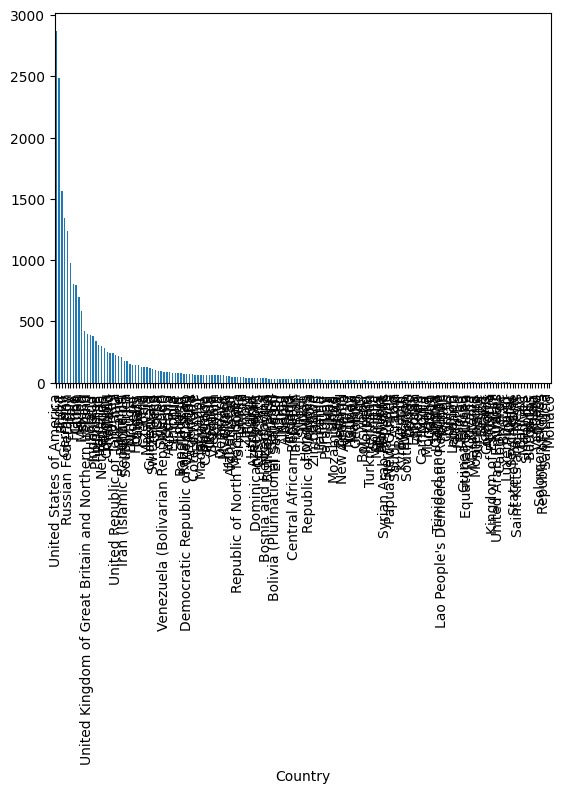

In [12]:
air['Country'].value_counts().plot.bar()

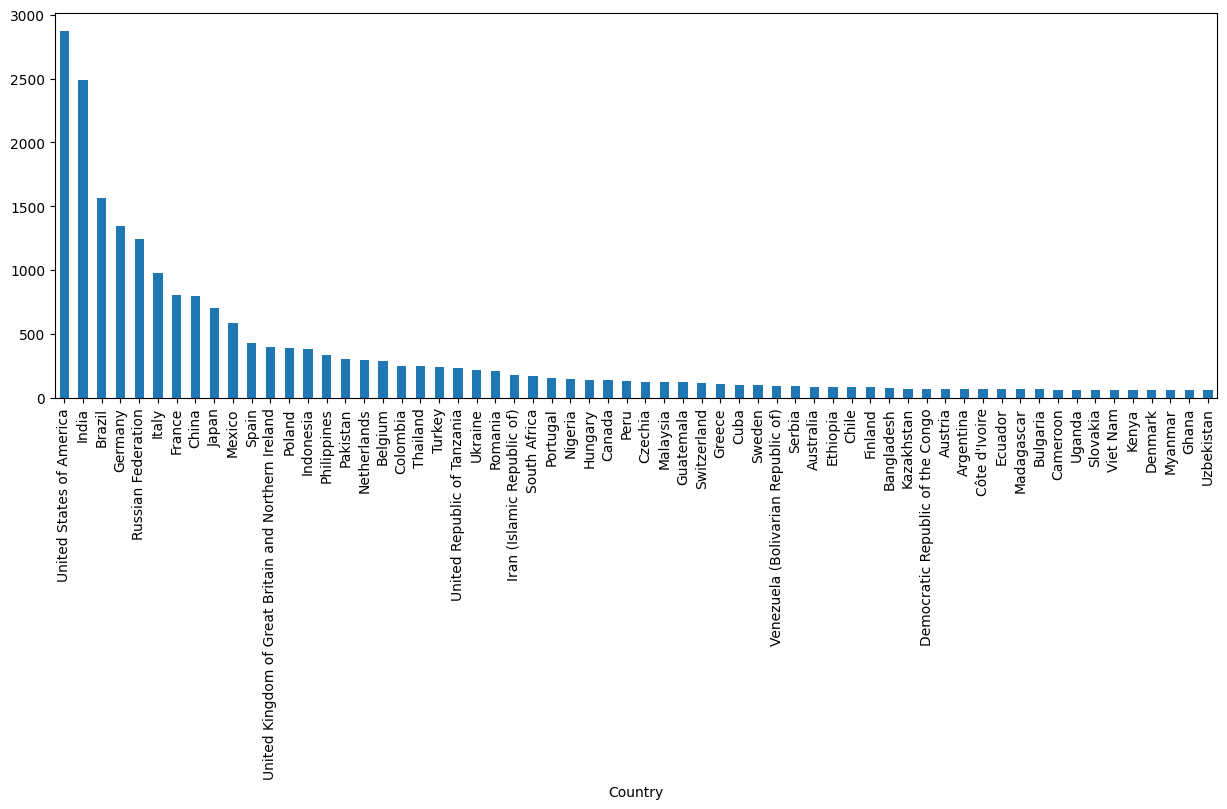

In [13]:
#Plotting the countries with more than 50 values
filtered_countries = air['Country'].value_counts()[air['Country'].value_counts() > 50]

# Plot the filtered data
plt.figure(figsize=(15, 5)) 
filtered_countries.plot.bar()
plt.show()

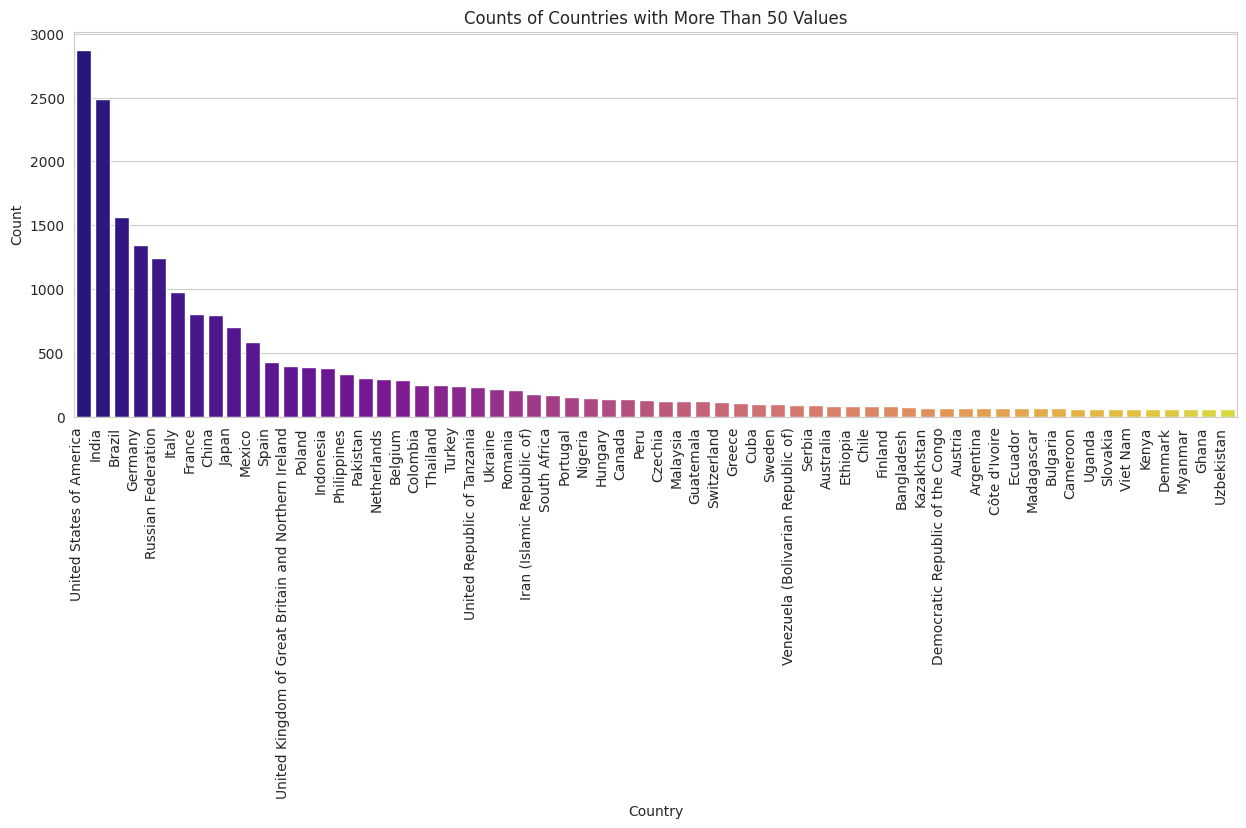

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'air' is your DataFrame containing the data
# Filter the countries with more than 50 values
filtered_countries = air['Country'].value_counts()[air['Country'].value_counts() > 50]

# Set the seaborn style
sns.set_style("whitegrid")

# Plot the filtered data with seaborn
plt.figure(figsize=(15, 5)) 
sns.barplot(x=filtered_countries.index, y=filtered_countries, palette="plasma")
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Countries with More Than 50 Values')
plt.xticks(rotation=90, ha='right')
plt.show()


Lets check the places with hazardous air quality

In [15]:
max_aq=air[air['AQI Value']==air['AQI Value'].max()]
max_aq

Country          City  AQI Value AQI Category  CO AQI Value  \
276              Pakistan  Bahawalnagar        500    Hazardous             1   
470                 India         Rania        500    Hazardous             1   
524                 India        Gohana        500    Hazardous             1   
611                 India       Gunnaur        500    Hazardous             1   
620              Pakistan     Harunabad        500    Hazardous             1   
...                   ...           ...        ...          ...           ...   
22110               India     Surajgarh        500    Hazardous             1   
22259  Russian Federation         Tynda        500    Hazardous            21   
22577               India        Bahjoi        500    Hazardous             1   
22824               India        Bilari        500    Hazardous             4   
22842               India  Sikandarabad        500    Hazardous             2   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
276              Good               38               Good              1   
470              Good               40               Good              0   
524              Good               47               Good              1   
611              Good               73           Moderate              1   
620              Good               43               Good              0   
...               ...              ...                ...            ...   
22110            Good               40               Good              0   
22259            Good                8               Good             17   
22577            Good               53           Moderate              1   
22824            Good              158          Unhealthy              4   
22842            Good               42               Good              3   

      NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
276               Good              466          Hazardous  
470               Good              464          Hazardous  
524               Good              500          Hazardous  
611               Good              500          Hazardous  
620               Good              443          Hazardous  
...                ...              ...                ...  
22110             Good              464          Hazardous  
22259             Good              475          Hazardous  
22577             Good              447          Hazardous  
22824             Good              457          Hazardous  
22842             Good              500          Hazardous  

[103 rows x 12 columns]

In [16]:
min_aq=air[air['AQI Value']==air['AQI Value'].min()]
min_aq

Country      City  AQI Value AQI Category  \
512  Bolivia (Plurinational State of)  El Torno          6         Good   

     CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
512             0            Good                5               Good   

     NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
512              0             Good                6               Good

Places from each country with the best Air quality

In [17]:
min_aq_per_country = []

# Iterate over each unique country
for country in air['Country'].unique():
    # Filter data for the current country
    country_data = air[air['Country'] == country]
    # Find the minimum AQI value for the current country
    min_aq_value = country_data['AQI Value'].min()
    # Find the corresponding row(s) with the minimum AQI value
    min_aq_rows = country_data[country_data['AQI Value'] == min_aq_value]
    # Append the result to the list
    min_aq_per_country.append(min_aq_rows)

# Concatenate the list of DataFrames into a single DataFrame
min_aq_per_country_df = pd.concat(min_aq_per_country)

# Display the result
min_aq_per_country_df


Country        City  AQI Value AQI Category  \
12323     Russian Federation     Pechora         17         Good   
13814                 Brazil   Andradina         11         Good   
15343                 Brazil    Tarauaca         11         Good   
22183                 Brazil  Correntina         11         Good   
2873                   Italy    Codroipo         27         Good   
...                      ...         ...        ...          ...   
15453                Bahrain      Manama        188    Unhealthy   
16001             Seychelles    Victoria         26         Good   
17025     State of Palestine   Jerusalem         86     Moderate   
22311  Saint Kitts and Nevis  Basseterre         90     Moderate   
22749                 Monaco  Beausoleil         56     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value  \
12323             1            Good               17   
13814             1            Good               11   
15343             1            Good                2   
22183             0            Good               11   
2873              1            Good               27   
...             ...             ...              ...   
15453             2            Good              127   
16001             0            Good               25   
17025             1            Good               85   
22311             1            Good               25   
22749             1            Good               56   

                   Ozone AQI Category  NO2 AQI Value NO2 AQI Category  \
12323                            Good              1             Good   
13814                            Good              0             Good   
15343                            Good              0             Good   
22183                            Good              0             Good   
2873                             Good              2             Good   
...                               ...            ...              ...   
15453  Unhealthy for Sensitive Groups              3             Good   
16001                            Good              0             Good   
17025                        Moderate              2             Good   
22311                            Good              0             Good   
22749                        Moderate              1             Good   

       PM2.5 AQI Value PM2.5 AQI Category  
12323               17               Good  
13814               11               Good  
15343               11               Good  
22183                3               Good  
2873                20               Good  
...                ...                ...  
15453              188          Unhealthy  
16001               26               Good  
17025               86           Moderate  
22311               90           Moderate  
22749               42               Good  

[211 rows x 12 columns]

Notice how Bahrain has the unhealthy AQI even though we have just extracted the data with the minimun values from each country. This may be because of less amount of data.


In [18]:
air[air['Country'] == "Bahrain"]


Country    City  AQI Value AQI Category  CO AQI Value CO AQI Category  \
15453  Bahrain  Manama        188    Unhealthy             2            Good   

       Ozone AQI Value              Ozone AQI Category  NO2 AQI Value  \
15453              127  Unhealthy for Sensitive Groups              3   

      NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
15453             Good              188          Unhealthy

In [19]:
aus_df = air[air['Country'] == "Australia"]
aus_df

Country            City  AQI Value AQI Category  CO AQI Value  \
173    Australia       Geraldton         29         Good             0   
1635   Australia        Ballarat         22         Good             0   
2029   Australia         Ballina         34         Good             0   
2066   Australia       Bundaberg         32         Good             0   
2314   Australia  Port Macquarie         29         Good             0   
...          ...             ...        ...          ...           ...   
21397  Australia         Whyalla         31         Good             0   
21492  Australia           Dubbo         15         Good             0   
21742  Australia          Gympie         25         Good             0   
21842  Australia   Mount Gambier         18         Good             0   
23114  Australia       Caloundra         28         Good             0   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
173              Good               29               Good              0   
1635             Good               13               Good              6   
2029             Good               34               Good              1   
2066             Good               32               Good              0   
2314             Good               29               Good              0   
...               ...              ...                ...            ...   
21397            Good               25               Good              0   
21492            Good               15               Good              0   
21742            Good               25               Good              3   
21842            Good               18               Good              0   
23114            Good               28               Good              2   

      NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
173               Good               13               Good  
1635              Good               22               Good  
2029              Good               15               Good  
2066              Good               10               Good  
2314              Good                7               Good  
...                ...              ...                ...  
21397             Good               31               Good  
21492             Good               13               Good  
21742             Good               17               Good  
21842             Good               14               Good  
23114             Good               17               Good  

[85 rows x 12 columns]

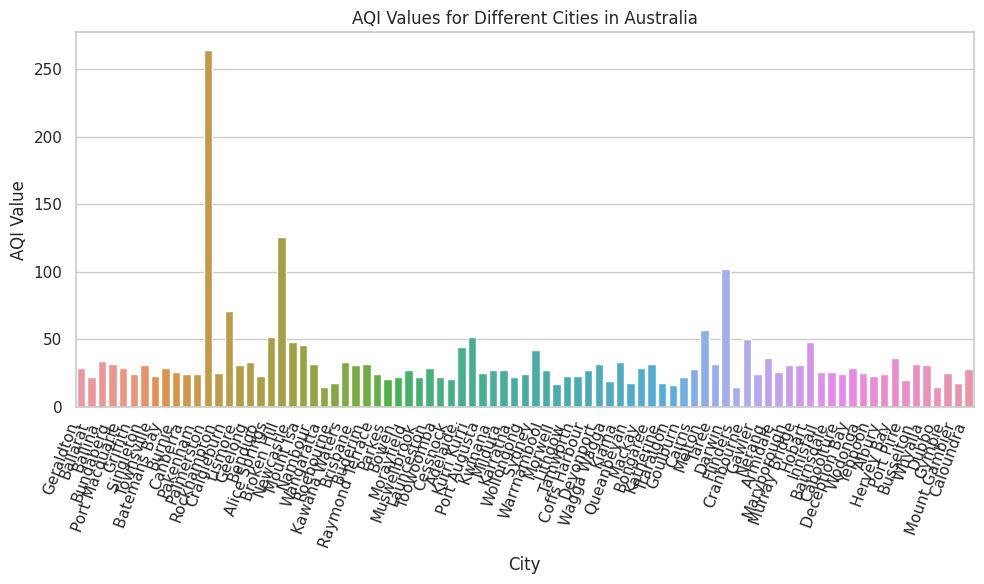

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="husl")

# Plot AQI values for different cities in Australia
plt.figure(figsize=(10, 6))
sns.barplot(x=aus_df['City'], y=aus_df['AQI Value'])
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.title('AQI Values for Different Cities in Australia')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()


In [21]:
aus_df[aus_df['AQI Value']>= 50]

Country           City  AQI Value                    AQI Category  \
4846   Australia     Palmerston        264                  Very Unhealthy   
4886   Australia    Craigieburn         71                        Moderate   
5646   Australia  Alice Springs         52                        Moderate   
6094   Australia    Broken Hill        126  Unhealthy for Sensitive Groups   
12594  Australia    Kurri Kurri         52                        Moderate   
18912  Australia         Melton         57                        Moderate   
19216  Australia         Darwin        102  Unhealthy for Sensitive Groups   
19425  Australia     Cranbourne         50                            Good   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
4846              9            Good                2               Good   
4886              2            Good                0               Good   
5646              0            Good               18               Good   
6094              0            Good               15               Good   
12594             1            Good                2               Good   
18912             1            Good                2               Good   
19216             2            Good               58           Moderate   
19425             1            Good                7               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value  \
4846              17             Good              264   
4886              20             Good               71   
5646               0             Good               52   
6094               0             Good              126   
12594             16             Good               52   
18912             18             Good               57   
19216              1             Good              102   
19425             17             Good               50   

                   PM2.5 AQI Category  
4846                   Very Unhealthy  
4886                         Moderate  
5646                         Moderate  
6094   Unhealthy for Sensitive Groups  
12594                        Moderate  
18912                        Moderate  
19216  Unhealthy for Sensitive Groups  
19425                            Good

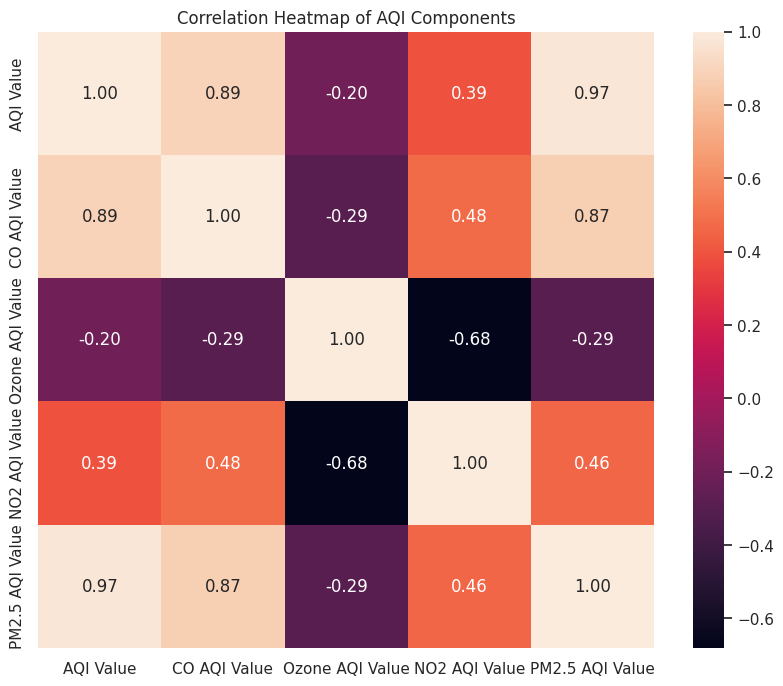

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = aus_df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of AQI Components')
plt.show()


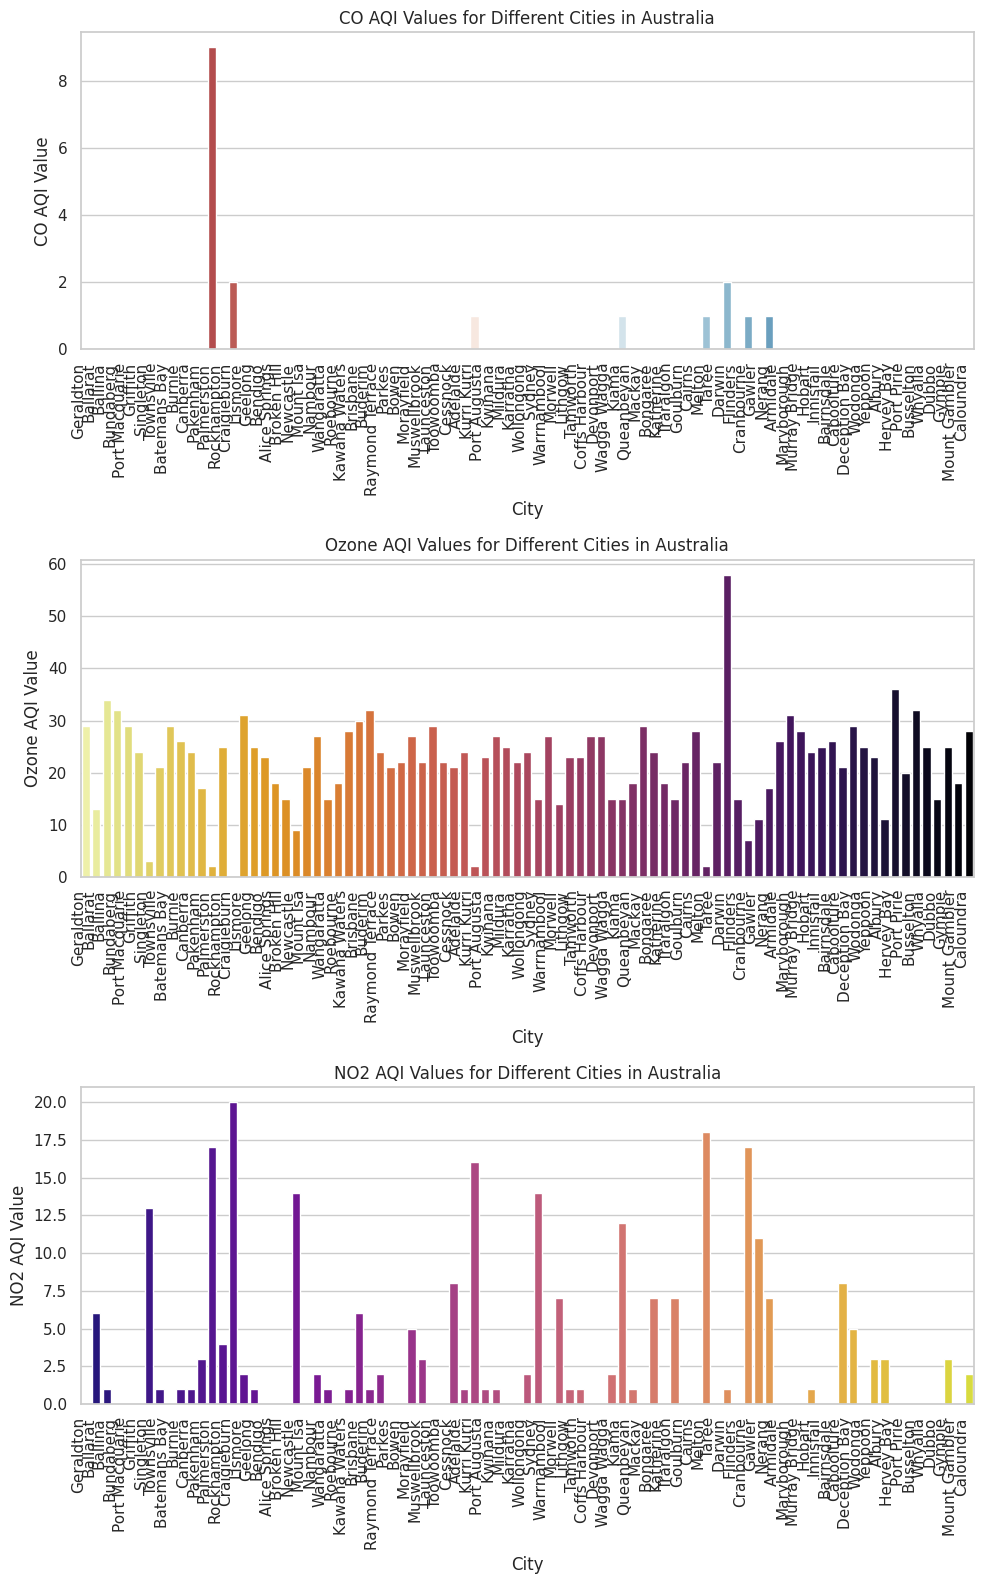

In [23]:
# Plot AQI values for CO, Ozone, and NO2 vertically with all values visible
plt.figure(figsize=(10, 16))

# Plot CO AQI values
plt.subplot(3, 1, 1)
sns.barplot(x=aus_df['City'], y=aus_df['CO AQI Value'], palette="RdBu")
plt.xlabel('City')
plt.ylabel('CO AQI Value')
plt.title('CO AQI Values for Different Cities in Australia')
plt.xticks(rotation=90, ha='right')

# Plot Ozone AQI values
plt.subplot(3, 1, 2)
sns.barplot(x=aus_df['City'], y=aus_df['Ozone AQI Value'], palette="inferno_r")
plt.xlabel('City')
plt.ylabel('Ozone AQI Value')
plt.title('Ozone AQI Values for Different Cities in Australia')
plt.xticks(rotation=90, ha='right')

# Plot NO2 AQI values
plt.subplot(3, 1, 3)
sns.barplot(x=aus_df['City'], y=aus_df['NO2 AQI Value'], palette="plasma")
plt.xlabel('City')
plt.ylabel('NO2 AQI Value')
plt.title('NO2 AQI Values for Different Cities in Australia')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# Set display options to show all rows and columns
#pd.set_option('display.max_rows', None)

# Now, when you print your DataFrame, it will display all rows
aus_df


Country            City  AQI Value AQI Category  CO AQI Value  \
173    Australia       Geraldton         29         Good             0   
1635   Australia        Ballarat         22         Good             0   
2029   Australia         Ballina         34         Good             0   
2066   Australia       Bundaberg         32         Good             0   
2314   Australia  Port Macquarie         29         Good             0   
...          ...             ...        ...          ...           ...   
21397  Australia         Whyalla         31         Good             0   
21492  Australia           Dubbo         15         Good             0   
21742  Australia          Gympie         25         Good             0   
21842  Australia   Mount Gambier         18         Good             0   
23114  Australia       Caloundra         28         Good             0   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
173              Good               29               Good              0   
1635             Good               13               Good              6   
2029             Good               34               Good              1   
2066             Good               32               Good              0   
2314             Good               29               Good              0   
...               ...              ...                ...            ...   
21397            Good               25               Good              0   
21492            Good               15               Good              0   
21742            Good               25               Good              3   
21842            Good               18               Good              0   
23114            Good               28               Good              2   

      NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
173               Good               13               Good  
1635              Good               22               Good  
2029              Good               15               Good  
2066              Good               10               Good  
2314              Good                7               Good  
...                ...              ...                ...  
21397             Good               31               Good  
21492             Good               13               Good  
21742             Good               17               Good  
21842             Good               14               Good  
23114             Good               17               Good  

[85 rows x 12 columns]

**Understanding the Australian Air Quality Data:**

**Air Quality Index (AQI):** 
* The AQI values range from 15 to 264.
* Most cities have AQI values within the "Good" category, with a few exceptions falling into "Moderate" or "Unhealthy for Sensitive Groups" categories.

**Component Analysis:**
* **CO AQI Value:** Most cities have CO AQI values of 0, indicating good air quality in terms of carbon monoxide levels. However, there are some instances of higher CO AQI values, such as 9 and 2, which might be worth investigating further.
* **Ozone AQI Value:** Ozone AQI values generally range from 0 to 58, with some cities having higher values (e.g., 58, 27), potentially indicating higher ozone levels.
* **NO2 AQI Value:** The NO2 AQI values vary across cities, with most falling within the "Good" category. However, some cities have moderate AQI values, reaching up to 14.
* **PM2.5 AQI Value:** PM2.5 AQI values also vary, with most falling within the "Good" category. However, there are instances of higher values, such as 26 and 19.

**Geographical Variations:**
* There are noticeable variations in AQI values across different cities in Australia, which might be attributed to various factors such as industrial activities, traffic congestion, geographical location, and meteorological conditions.

**Outliers:**
* The dataset includes a few outliers, such as the city of Palmerston with very unhealthy AQI values for CO and PM2.5.

**Regional Patterns:**
* There might be regional patterns in air quality based on the location of cities. Coastal cities like Sydney and Brisbane seem to have relatively higher AQI values compared to inland cities.

Back to analyzing whole worlds air quality

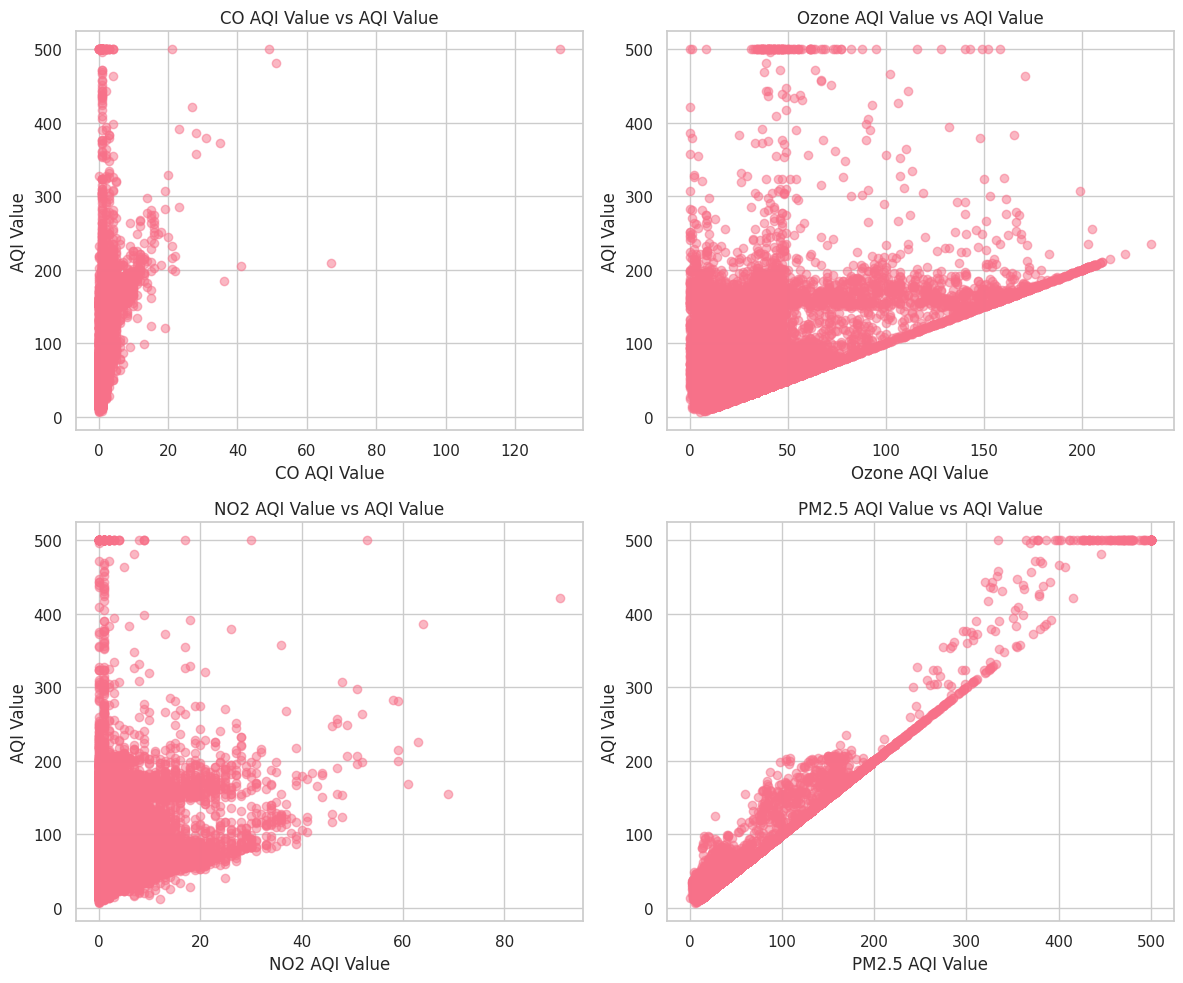

In [25]:
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
aqi_values = air['AQI Value']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.scatter(air[pollutants[i]], aqi_values, alpha=0.5)
    ax.set_xlabel(pollutants[i])
    ax.set_ylabel('AQI Value')
    ax.set_title(f'{pollutants[i]} vs AQI Value')

plt.tight_layout()
plt.show()

In [26]:
air.corr(numeric_only=True)

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.430602         0.405310       0.231758   
CO AQI Value      0.430602      1.000000         0.145724       0.488092   
Ozone AQI Value   0.405310      0.145724         1.000000      -0.181818   
NO2 AQI Value     0.231758      0.488092        -0.181818       1.000000   
PM2.5 AQI Value   0.984327      0.438557         0.339887       0.260127   

                 PM2.5 AQI Value  
AQI Value               0.984327  
CO AQI Value            0.438557  
Ozone AQI Value         0.339887  
NO2 AQI Value           0.260127  
PM2.5 AQI Value         1.000000

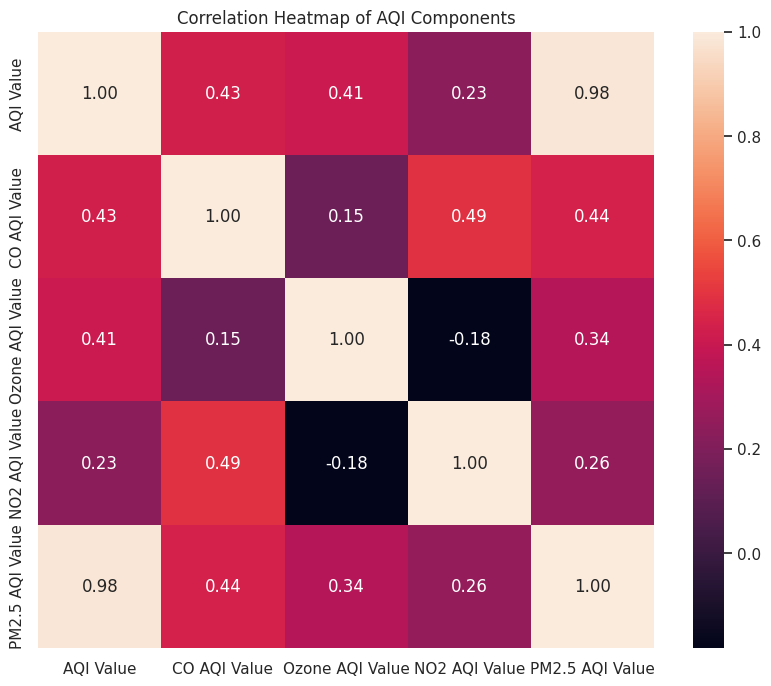

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = air[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of AQI Components')
plt.show()


Overall Air Quality: The majority of cities exhibit good air quality, while a significant portion experiences moderate to unhealthy conditions, with a smaller fraction reaching very unhealthy and hazardous levels.

Regional Disparities: India notably has a substantial number of cities with high AQI values, indicating severe pollution issues, while Brazil stands out for having the most cities with good air quality.

Pollutant Contribution: PM2.5 emerges as a critical pollutant affecting overall air quality, with a clear positive correlation with the AQI. Other pollutants like CO and Ozone also play a role, albeit to a lesser extent.

Correlation Analysis: PM2.5 AQI Value demonstrates a strong positive correlation with overall AQI, suggesting its significant impact on air pollution levels. Meanwhile, Carbon Monoxide and Ozone show weaker correlations with AQI.

In [28]:
# Make a list of countries.
top_list = (air.groupby('Country')
               # Count the rows: any column without missing values
               ['AQI Category'].count()
               # Sort values.
               .sort_values(ascending=False)
               .head(15)
               .index
               .to_list())


# See function defined in the beginning of this notebook.
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_list,
    category_column='AQI Category',
    ylabel='',
    xlabel='',
    plttitle="Air quality index:\nIndia and China have the most risky levels\n",
    palette='viridis'
)

NameError: name 'make_heatmap_cities_per_countries_and_categories' is not defined

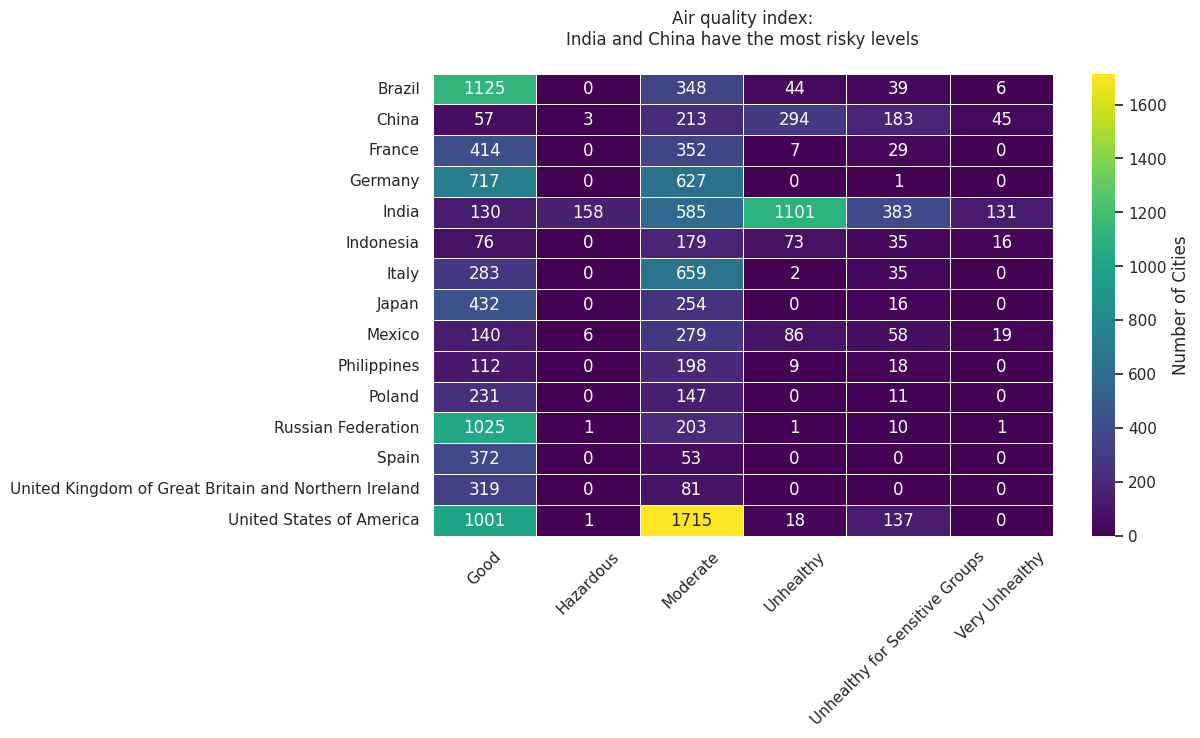

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a list of countries.
top_list = (air.groupby('Country')
               ['AQI Category'].count()
               .sort_values(ascending=False)
               .head(15)
               .index
               .to_list())

# Filter data for top countries
filtered_data = air[air['Country'].isin(top_list)]

# Pivot table to get counts of categories per country
pivot_table = filtered_data.pivot_table(index='Country', columns='AQI Category', aggfunc='size', fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Cities'})

# Set labels and title
plt.xlabel('')
plt.ylabel('')
plt.title("Air quality index:\nIndia and China have the most risky levels\n")
plt.xticks(rotation=45)

# Show plot
plt.show()


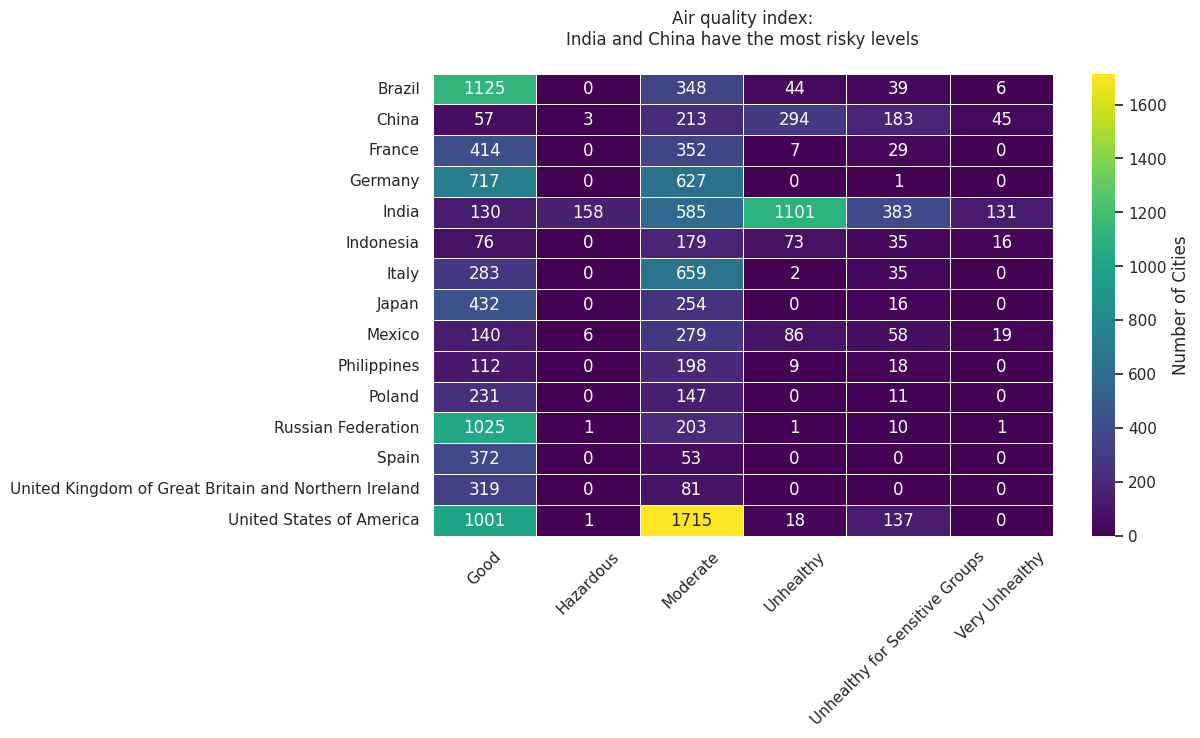

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a list of countries.
top_list = (air.groupby('Country')
               ['AQI Category'].count()
               .sort_values(ascending=False)
               .head(15)
               .index
               .to_list())

# Filter data for top countries
filtered_data = air[air['Country'].isin(top_list)]

# Pivot table to get counts of categories per country
pivot_table = filtered_data.pivot_table(index='Country', columns='AQI Category', aggfunc='size', fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Cities'})

# Set labels and title
plt.xlabel('')
plt.ylabel('')
plt.title("Air quality index:\nIndia and China have the most risky levels\n")
plt.xticks(rotation=45)

# Show plot
plt.show()


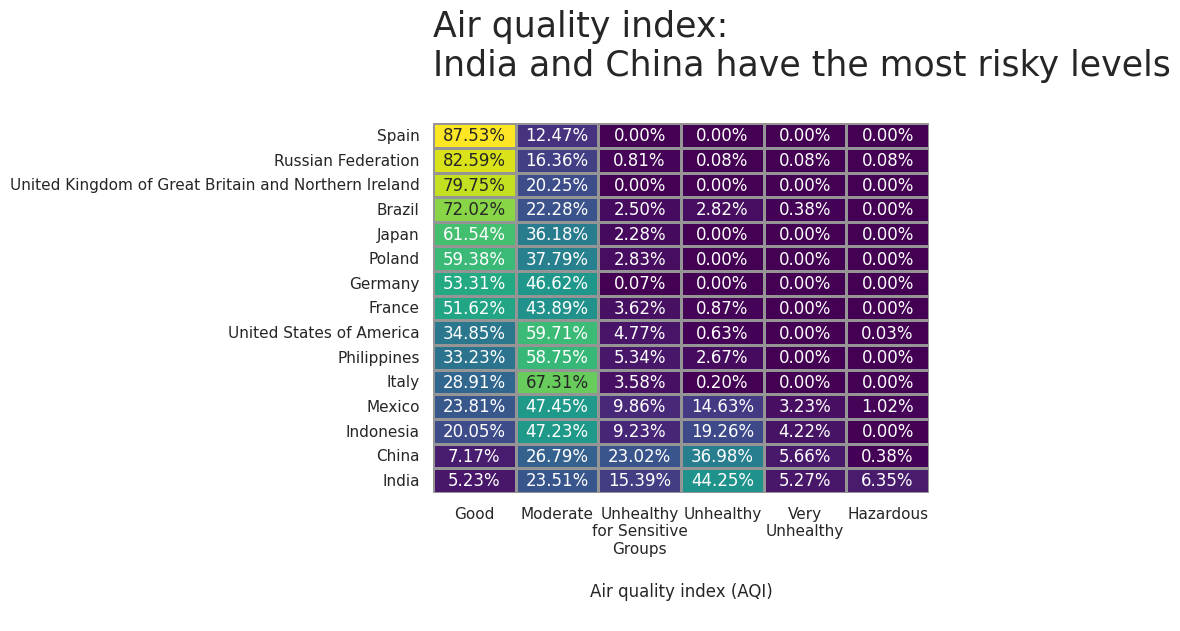

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a dataframe with countries selected.
df = air.query('Country in @top_list')

# Enumerate categories to bring some order into visualizations.
for column in ['AQI Category']:
    i = 0
    for item in ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']:
        i+=1
        df.loc[df[column] == item, column] = f'{i}. {item}'

fig, ax = plt.subplots()

# The heatmap is based on this crosstab.
this_crosstab = pd.crosstab(
    # Count the cities per each country and category.
    index=df['Country'],
    columns=df['AQI Category'],
    values=df['City'],
    aggfunc='count',

    # Normalize by dividing all values by the sum of values
    # (over each column).
    normalize='index'
)

# Make a heatmap.
sns.heatmap(
    this_crosstab
    # Sort values of the crosstab by the first column.
    .sort_values(by='1. Good', ascending=False),

    # Start of the heatmap's code.
    # Palette.
    cmap='viridis',
    # Annotations.
    annot=True,
    fmt='.2%',
    # Edges.
    linecolor='#959595',
    linewidths=.75,
    # Colorbar is redundant.
    cbar=False,
    ax=ax
)

# Y
ax.set_ylabel('')

# X
ax.set_xlabel('\nAir quality index (AQI)\n')
ax.set_xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
ax.set_xticklabels(['Good', 'Moderate', 'Unhealthy\nfor Sensitive\nGroups',
                    'Unhealthy', 'Very\nUnhealthy', 'Hazardous'], rotation=360, ha='center')

# Title.
ax.set_title("Air quality index:\nIndia and China have the most risky levels\n", fontsize=25, loc='left')

# Describe how to show nans.
ax.patch.set(hatch='xx', edgecolor='lightgrey')

# Show visualization.
plt.show()


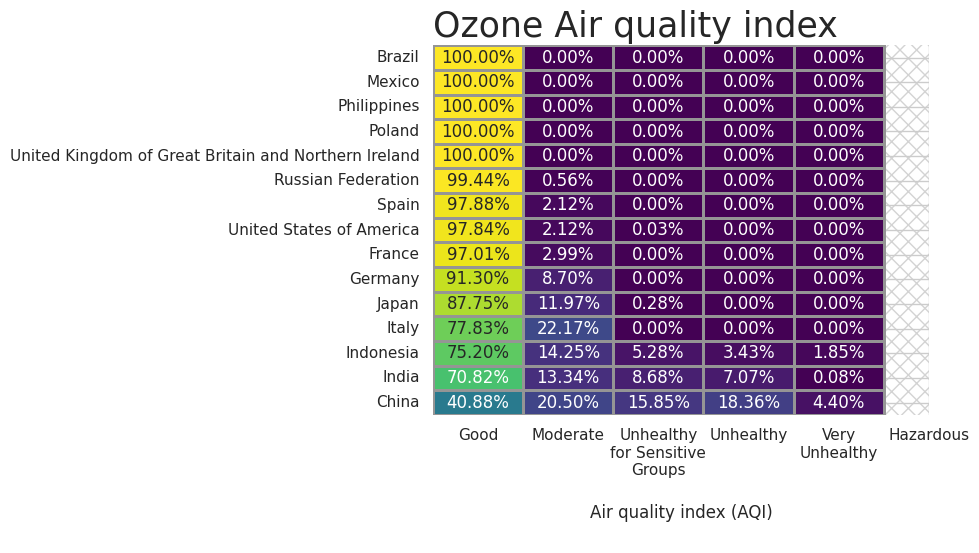

In [32]:
# Make a dataframe with countries selected.
df = air.query('Country in @top_list')

# Enumerate categories to bring some order into visualizations.
for column in ['Ozone AQI Category']:
    i = 0
    for item in ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']:
        i+=1
        df.loc[df[column] == item, column] = f'{i}. {item}'

fig, ax = plt.subplots()

# The heatmap is based on this crosstab.
this_crosstab = pd.crosstab(
    # Count the cities per each country and category.
    index=df['Country'],
    columns=df['Ozone AQI Category'],
    values=df['City'],
    aggfunc='count',

    # Normalize by dividing all values by the sum of values
    # (over each column).
    normalize='index'
)

# Make a heatmap.
sns.heatmap(
    this_crosstab
    # Sort values of the crosstab by the first column.
    .sort_values(by='1. Good', ascending=False),

    # Start of the heatmap's code.
    # Palette.
    cmap='viridis',
    # Annotations.
    annot=True,
    fmt='.2%',
    # Edges.
    linecolor='#959595',
    linewidths=.75,
    # Colorbar is redundant.
    cbar=False,
    ax=ax
)

# Y
ax.set_ylabel('')

# X
ax.set_xlabel('\nAir quality index (AQI)\n')
ax.set_xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
ax.set_xticklabels(['Good', 'Moderate', 'Unhealthy\nfor Sensitive\nGroups',
                    'Unhealthy', 'Very\nUnhealthy', 'Hazardous'], rotation=360, ha='center')

# Title.
ax.set_title("Ozone Air quality index", fontsize=25, loc='left')

# Describe how to show nans.
ax.patch.set(hatch='xx', edgecolor='lightgrey')

# Show visualization.
plt.show()

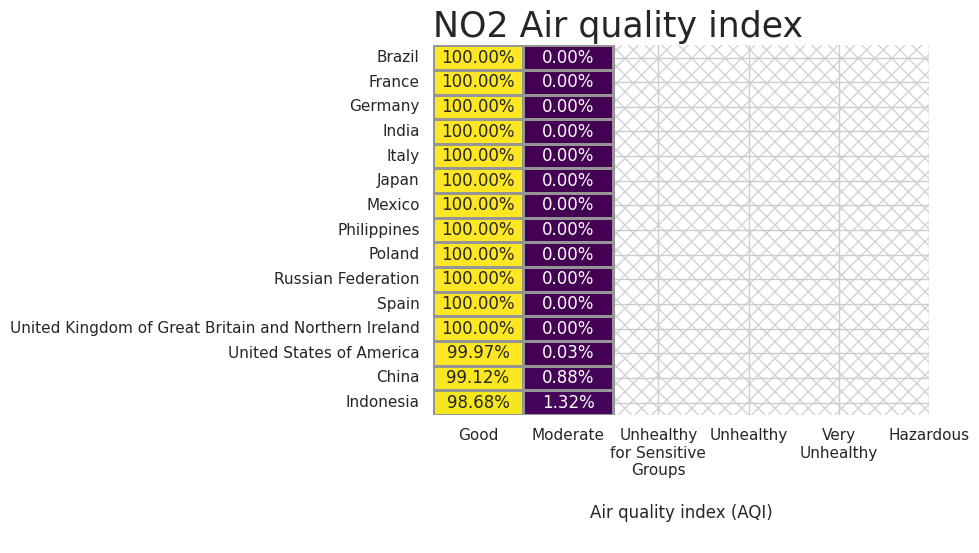

In [33]:
# Make a dataframe with countries selected.
df = air.query('Country in @top_list')

# Enumerate categories to bring some order into visualizations.
for column in ['NO2 AQI Category']:
    i = 0
    for item in ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']:
        i+=1
        df.loc[df[column] == item, column] = f'{i}. {item}'

fig, ax = plt.subplots()

# The heatmap is based on this crosstab.
this_crosstab = pd.crosstab(
    # Count the cities per each country and category.
    index=df['Country'],
    columns=df['NO2 AQI Category'],
    values=df['City'],
    aggfunc='count',

    # Normalize by dividing all values by the sum of values
    # (over each column).
    normalize='index'
)

# Make a heatmap.
sns.heatmap(
    this_crosstab
    # Sort values of the crosstab by the first column.
    .sort_values(by='1. Good', ascending=False),

    # Start of the heatmap's code.
    # Palette.
    cmap='viridis',
    # Annotations.
    annot=True,
    fmt='.2%',
    # Edges.
    linecolor='#959595',
    linewidths=.75,
    # Colorbar is redundant.
    cbar=False,
    ax=ax
)

# Y
ax.set_ylabel('')

# X
ax.set_xlabel('\nAir quality index (AQI)\n')
ax.set_xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
ax.set_xticklabels(['Good', 'Moderate', 'Unhealthy\nfor Sensitive\nGroups',
                    'Unhealthy', 'Very\nUnhealthy', 'Hazardous'], rotation=360, ha='center')

# Title.
ax.set_title("NO2 Air quality index", fontsize=25, loc='left')

# Describe how to show nans.
ax.patch.set(hatch='xx', edgecolor='lightgrey')

# Show visualization.
plt.show()

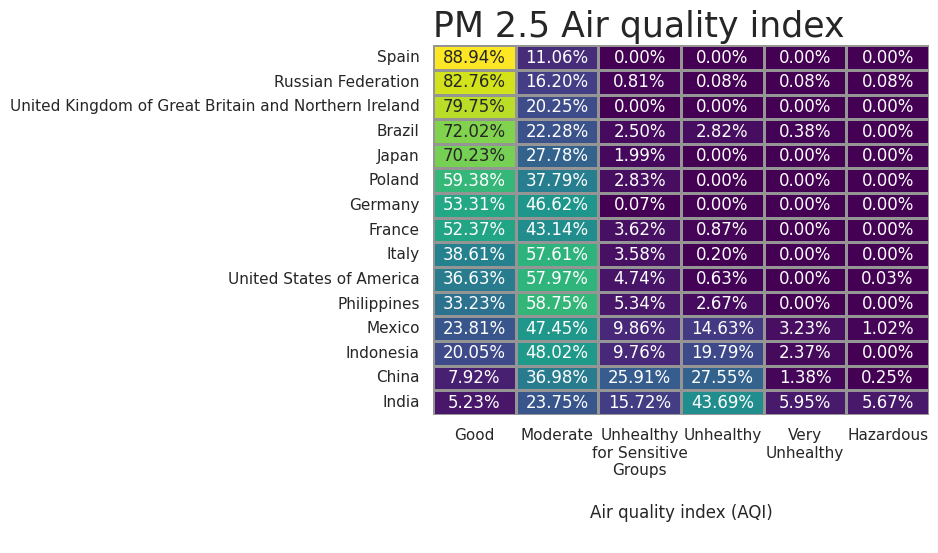

In [34]:
# Make a dataframe with countries selected.
df = air.query('Country in @top_list')

# Enumerate categories to bring some order into visualizations.
for column in ['PM2.5 AQI Category']:
    i = 0
    for item in ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']:
        i+=1
        df.loc[df[column] == item, column] = f'{i}. {item}'

fig, ax = plt.subplots()

# The heatmap is based on this crosstab.
this_crosstab = pd.crosstab(
    # Count the cities per each country and category.
    index=df['Country'],
    columns=df['PM2.5 AQI Category'],
    values=df['City'],
    aggfunc='count',

    # Normalize by dividing all values by the sum of values
    # (over each column).
    normalize='index'
)

# Make a heatmap.
sns.heatmap(
    this_crosstab
    # Sort values of the crosstab by the first column.
    .sort_values(by='1. Good', ascending=False),

    # Start of the heatmap's code.
    # Palette.
    cmap='viridis',
    # Annotations.
    annot=True,
    fmt='.2%',
    # Edges.
    linecolor='#959595',
    linewidths=.75,
    # Colorbar is redundant.
    cbar=False,
    ax=ax
)

# Y
ax.set_ylabel('')

# X
ax.set_xlabel('\nAir quality index (AQI)\n')
ax.set_xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
ax.set_xticklabels(['Good', 'Moderate', 'Unhealthy\nfor Sensitive\nGroups',
                    'Unhealthy', 'Very\nUnhealthy', 'Hazardous'], rotation=360, ha='center')

# Title.
ax.set_title("PM 2.5 Air quality index", fontsize=25, loc='left')

# Describe how to show nans.
ax.patch.set(hatch='xx', edgecolor='lightgrey')

# Show visualization.
plt.show()

### Observations
**Air quality index**
These countries have a significant percentage of locations labelled 'Unhealthy for Sensitive Groups' or 'Unhealthy':

* India (15.4% and 44.2% respectively)
* China (23% and 37% respectively)

In India, a significant percentage of locations are marked with the worst category, 'Dangerous' (6.3%). At the same time, less than one-third of Indian locations were considered as having a 'Good' or 'Moderate' air quality index: everything else is below the line of healthy conditions.
Having about 5-7% of 'good' locations, India and China are strikingly different from the rest of the countries. Indonesia and Mexico, countries that precede them in the rating of air quality index, have over 20-23% of 'good' locations.
The best air quality index, from 'Good' to 'Moderate', can be found in Spain. Unlike the others, this country seems to have no locations listed under more risky categories.


**Carbon monoxide (CO)**
* No country has her locations marked as belonging to one of the risky categories. It is possible that only the 'Good' to 'Moderate' scale is used for measurements.
* With a 'Good' performance in all 15 countries, only the USA has a minor percentage of 'Moderate' locations.

**Nitrogen dioxide**
* Just like in the case of Carbon Monoxide, the two-part scale - from 'Good' to 'Moderate' - is presented.
* Relatively worse conditions can be found in:
* Indonesia (1.3% of areas are labelled as 'Moderate')
* China (0.9%)
* A really minor percentage of 'Moderate' areas can be found in the USA (0.3%).

**Atmospheric particulate matter (pm2.5)**
* A picture has some resemblance to that of the air quality index categories.
* Similar to the air quality index, the worst conditions can be found in India, China, Indonesia and Mexico.
* The divide between India and China (about 5-8% of 'Good' areas) and Indonesia and Mexico (20-24%) remains almost the same in comparison to the air quality index.
* Once again, less than one-third of Indian locations are labelled 'Good' to 'Moderate' with about 44% being considered 'Unhealthy'.

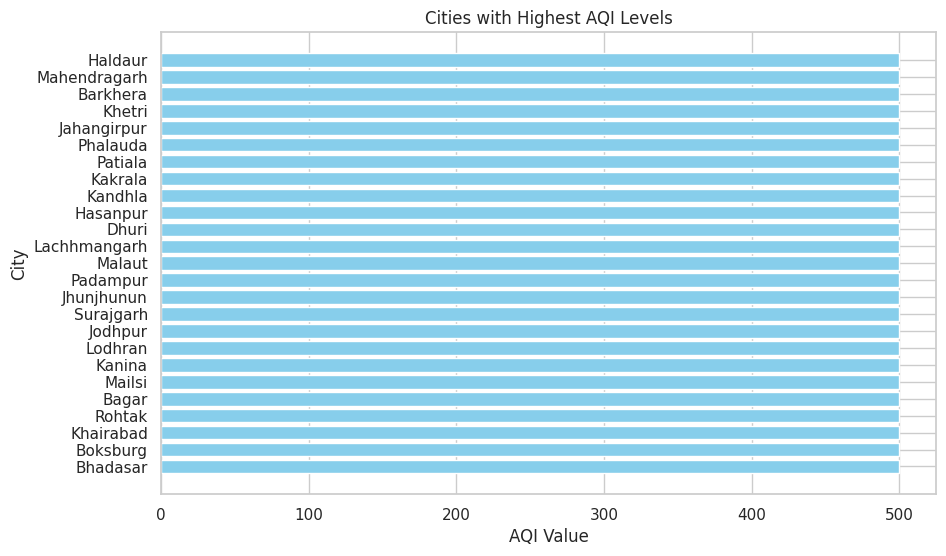

In [35]:
# Sort the dataset based on AQI Value column in descending order
sorted_air = air.sort_values(by='AQI Value', ascending=False)

# Select the top 10 cities with the highest AQI values
top_cities = sorted_air.head(25)

# Plot the cities with the highest AQI levels
plt.figure(figsize=(10, 6))
plt.barh(top_cities['City'], top_cities['AQI Value'], color='skyblue')
plt.xlabel('AQI Value')
plt.ylabel('City')
plt.title('Cities with Highest AQI Levels')
plt.gca().invert_yaxis()  # Invert y-axis to display the city with the highest AQI on top
plt.show()


In [36]:
air.nunique()

Country                 175
City                  23462
AQI Value               347
AQI Category              6
CO AQI Value             34
CO AQI Category           3
Ozone AQI Value         213
Ozone AQI Category        5
NO2 AQI Value            59
NO2 AQI Category          2
PM2.5 AQI Value         383
PM2.5 AQI Category        6
dtype: int64

/tmp/ipykernel_33/301615078.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


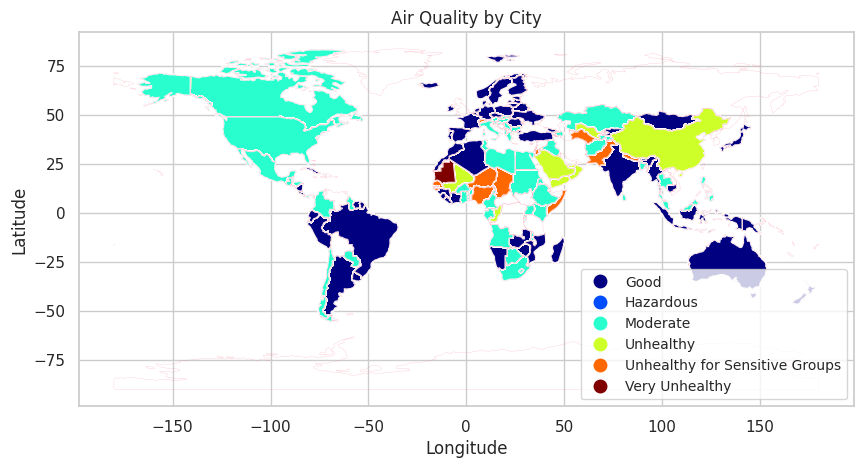

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of countries or regions
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge shapefile with air dataset on the country name
merged_data = world.merge(air, how='left', left_on='name', right_on='Country')

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the base map
world.boundary.plot(ax=ax, linewidth=0.1)

# Plot cities with color grading based on AQI level categories
merged_data.plot(column='AQI Category', ax=ax, legend=True,
                 legend_kwds={'loc': 'lower right', 'fontsize': 10},
                 cmap='jet', categorical=True, markersize=20)

# Add title and labels
plt.title('Air Quality by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Sample dataset (replace with your actual dataset)
data = air

# Initialize geocoder
geolocator = Nominatim(user_agent="city_aqi_plotter")

# Function to geocode city names and return latitude and longitude
def geocode_city(city_name, country_name):
    location = geolocator.geocode(f"{city_name}, {country_name}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Geocode cities and extract coordinates
city_coords = {}
for _, row in data.iterrows():
    lat, lon = geocode_city(row['City'], row['Country'])
    if lat is not None and lon is not None:
        city_coords[row['City']] = (lat, lon)

# Merge shapefile with dataset on the country name
merged_data = world.merge(data, how='left', left_on='name', right_on='Country')

# Define color mapping for AQI categories
colors = {'Good': 'green', 'Moderate': 'yellow', 
          'Unhealthy for Sensitive Groups': 'orange', 
          'Unhealthy': 'red', 'Very Unhealthy': 'purple', 
          'Hazardous': 'black'}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the world map
world.boundary.plot(ax=ax, linewidth=0.5)

# Plot cities with color-coded points based on AQI level categories
for city, (lat, lon) in city_coords.items():
    aqi_category = data[data['City'] == city]['AQI Category'].iloc[0]
    ax.scatter(lon, lat, color=colors[aqi_category], label=aqi_category, s=50, alpha=0.8)

# Add legend
plt.legend(title='AQI Category', loc='lower right')

# Add title
plt.title('Cities with AQI Level on World Map')

# Show the plot
plt.show()


/tmp/ipykernel_33/3017432721.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


KeyboardInterrupt: 

/tmp/ipykernel_33/3405220842.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


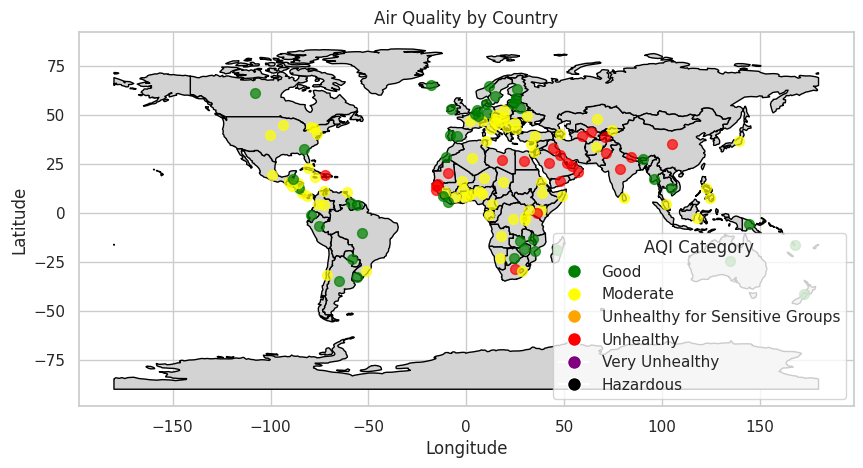

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Sample dataset
data = air  # Replace "your_dataset.csv" with your actual dataset filename

# Group by country and calculate average AQI value
country_avg_aqi = data.groupby('Country')['AQI Value'].mean().reset_index()

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Geocode country capitals to obtain latitude and longitude coordinates
geolocator = Nominatim(user_agent="air_quality_plotter")
country_avg_aqi['coordinates'] = country_avg_aqi['Country'].apply(lambda x: geolocator.geocode(x).point if geolocator.geocode(x) else None)
country_avg_aqi[['latitude', 'longitude', 'altitude']] = pd.DataFrame(country_avg_aqi['coordinates'].tolist(), index=country_avg_aqi.index)

# Merge world shapefile with average AQI values
world = world.merge(country_avg_aqi, how='left', left_on='name', right_on='Country')

# Define color mapping for AQI categories
colors = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for Sensitive Groups': 'orange', 
          'Unhealthy': 'red', 'Very Unhealthy': 'purple', 'Hazardous': 'black'}

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot cities on the map, color-coded by AQI level
for _, row in world.iterrows():
    if pd.notnull(row['AQI Value']):
        color = colors['Good'] if row['AQI Value'] <= 50 else colors['Moderate'] if row['AQI Value'] <= 100 else colors['Unhealthy']
        ax.scatter(row['longitude'], row['latitude'], color=color, label=row['Country'], alpha=0.7, s=50)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                   for category, color in colors.items()]
ax.legend(handles=legend_elements, title='AQI Category', loc='lower right')

# Add title and labels
ax.set_title('Air Quality by Country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


# Working on another Dataset with broader data

In [1]:
import pandas as pd
aq = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
aq

country     location_name  latitude  longitude         timezone  \
0      Afghanistan             Kabul     34.52      69.18       Asia/Kabul   
1          Albania            Tirana     41.33      19.82    Europe/Tirane   
2          Algeria           Algiers     36.76       3.05   Africa/Algiers   
3          Andorra  Andorra La Vella     42.50       1.52   Europe/Andorra   
4           Angola            Luanda     -8.84      13.23    Africa/Luanda   
...            ...               ...       ...        ...              ...   
39951    Venezuela           Caracas     10.50     -66.92  America/Caracas   
39952      Vietnam             Hanoi     21.03     105.85     Asia/Bangkok   
39953        Yemen             Sanaa     15.35      44.21        Asia/Aden   
39954       Zambia            Lusaka    -15.42      28.28    Africa/Lusaka   
39955     Zimbabwe            Harare    -17.82      31.04    Africa/Harare   

       last_updated_epoch      last_updated  temperature_celsius  \
0              1693301400  2023-08-29 14:00                 28.8   
1              1693301400  2023-08-29 11:30                 27.0   
2              1693301400  2023-08-29 10:30                 28.0   
3              1693301400  2023-08-29 11:30                 10.2   
4              1693301400  2023-08-29 10:30                 25.0   
...                   ...               ...                  ...   
39951          1711383300  2024-03-25 12:15                 29.0   
39952          1711383300  2024-03-25 23:15                 25.0   
39953          1711383300  2024-03-25 19:15                 15.7   
39954          1711383300  2024-03-25 18:15                 24.5   
39955          1711383300  2024-03-25 18:15                 23.2   

       temperature_fahrenheit      condition_text  ...  air_quality_PM2.5  \
0                        83.8               Sunny  ...                7.9   
1                        80.6       Partly cloudy  ...               28.2   
2                        82.4       Partly cloudy  ...                6.4   
3                        50.4               Sunny  ...                0.5   
4                        77.0       Partly cloudy  ...              139.6   
...                       ...                 ...  ...                ...   
39951                    84.2       Partly cloudy  ...               52.3   
39952                    77.0       Partly cloudy  ...               45.1   
39953                    60.3  Patchy rain nearby  ...                5.9   
39954                    76.1      Partly Cloudy   ...                7.0   
39955                    73.7  Patchy rain nearby  ...                8.6   

       air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0                  11.1                         1                          1   
1                  29.6                         2                          3   
2                   7.9                         1                          1   
3                   0.8                         1                          1   
4                 203.3                         4                         10   
...                 ...                       ...                        ...   
39951              64.4                         3                          6   
39952              69.9                         3                          5   
39953              12.0                         1                          1   
39954              12.6                         1                          1   
39955              11.1                         1                          1   

        sunrise    sunset  moonrise   moonset      moon_phase  \
0      05:24 AM  06:24 PM  05:39 PM  02:48 AM  Waxing Gibbous   
1      06:04 AM  07:19 PM  06:50 PM  03:25 AM  Waxing Gibbous   
2      06:16 AM  07:21 PM  06:46 PM  03:50 AM  Waxing Gibbous   
3      07:16 AM  08:34 PM  08:08 PM  04:38 AM  Waxing Gibbous   
4      06:11 AM  06:06 PM  04:43 PM  04:41 AM 

In [7]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39956 entries, 0 to 39955
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       39956 non-null  object 
 1   location_name                 39956 non-null  object 
 2   latitude                      39956 non-null  float64
 3   longitude                     39956 non-null  float64
 4   timezone                      39956 non-null  object 
 5   last_updated_epoch            39956 non-null  int64  
 6   last_updated                  39956 non-null  object 
 7   temperature_celsius           39956 non-null  float64
 8   temperature_fahrenheit        39956 non-null  float64
 9   condition_text                39956 non-null  object 
 10  wind_mph                      39956 non-null  float64
 11  wind_kph                      39956 non-null  float64
 12  wind_degree                   39956 non-null  int64  
 13  w

In [2]:
import folium
import pandas as pd
from folium.plugins import HeatMap
from IPython.display import display

# Load the dataset (replace 'data.csv' with your dataset path)
data = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')

# Create a Folium map centered at a specific latitude and longitude
m = folium.Map(location=[0, 0], zoom_start=2)  # You can adjust the coordinates and zoom level

# Create a list of coordinates and corresponding values (e.g., temperature)
locations = data[['latitude', 'longitude']].values
values = data['temperature_celsius'].values

# Normalize the values for the heatmap (adjust as needed)
max_value = max(values)
normalized_values = [v / max_value for v in values]

# Create a HeatMap layer on the map
HeatMap(list(zip(locations[:, 0], locations[:, 1], normalized_values))).add_to(m)

# Display the map in the Kaggle notebook
display(m)

In [4]:
import pandas as pd
import plotly.express as px

# Load the dataset (replace 'data.csv' with your dataset path)
data = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')

# Create an interactive temperature heatmap using Plotly Express
fig = px.scatter_geo(
    data,
    lat='latitude',
    lon='longitude',
    color='temperature_celsius',
    hover_name='location_name',
    projection='natural earth',  # Adjust the projection as needed
    title='Interactive Global Temperature Heatmap',
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the interactive map
fig.show()

In [8]:
import pandas as pd
import plotly.express as px

# Load the dataset (replace 'data.csv' with your dataset path)
data = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')

# Create an interactive temperature heatmap using Plotly Express
fig = px.scatter_geo(
    data,
    lat='latitude',
    lon='longitude',
    color='uv_index',
    hover_name='location_name',
    projection='natural earth',  # Adjust the projection as needed
    title='Interactive UV Index Heatmap',
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the interactive map
fig.show()

In [9]:
#, air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide   
#air_quality_PM2.5

import pandas as pd
import plotly.express as px

# Load the dataset (replace 'data.csv' with your dataset path)
data = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')

# Create an interactive temperature heatmap using Plotly Express
fig = px.scatter_geo(
    data,
    lat='latitude',
    lon='longitude',
    color='air_quality_Carbon_Monoxide',
    hover_name='location_name',
    projection='natural earth',  # Adjust the projection as needed
    title='Interactive CO Qaulity Heatmap',
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the interactive map
fig.show()

In [10]:
#air_quality_Carbon_Monoxide, ,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide   
#air_quality_PM2.5

import pandas as pd
import plotly.express as px

# Load the dataset (replace 'data.csv' with your dataset path)
data = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')

# Create an interactive temperature heatmap using Plotly Express
fig = px.scatter_geo(
    data,
    lat='latitude',
    lon='longitude',
    color='air_quality_Ozone',
    hover_name='location_name',
    projection='natural earth',  # Adjust the projection as needed
    title='Interactive Ozone Heatmap',
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the interactive map
fig.show()